In [2]:
import pandas as pd

In [3]:
review_info=pd.read_csv('/Users/zhengyanlin/Desktop/Data/game review case/review_info.csv')

/Users/zhengyanlin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
author_info=pd.read_csv('/Users/zhengyanlin/Desktop/Data/game review case/author_info.csv')

In [5]:
author_info.rename(columns={'author.steamid':'steam_id'},inplace=True)

In [6]:
author_info.dtypes

review_id                           int64
steam_id                            int64
author.num_games_owned              int64
author.num_reviews                  int64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object

In [7]:
author_info['steam_id']=author_info['steam_id'].astype('string')

In [8]:
author_info.dtypes

review_id                           int64
steam_id                           string
author.num_games_owned              int64
author.num_reviews                  int64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object

In [9]:
df=pd.merge(left=review_info, right=author_info, on='review_id', how='left')

In [10]:
#group data by steam_id and calculate how many 'voted helpful' each user has, rank in desc order

In [11]:
top_voted_reviews=df.groupby('steam_id')['votes_helpful'].sum().reset_index().sort_values('votes_helpful',ascending=False)
top_voted_reviews.head()

,steam_id,votes_helpful
586596,76561198301678331,26149.0
243715,76561198068792591,15526.0
342363,76561198107977827,14349.0
220174,76561198060932732,10610.0
486322,76561198193312194,10495.0


In [12]:
top_voted_reviews

,steam_id,votes_helpful
586596,76561198301678331,26149.0
243715,76561198068792591,15526.0
342363,76561198107977827,14349.0
220174,76561198060932732,10610.0
486322,76561198193312194,10495.0
...,...,...
154471,76561198038847694,0.0
444186,76561198158003620,0.0
444185,76561198158002751,0.0
444184,76561198158001692,0.0


In [160]:
top_voted_reviews.describe()

,votes_helpful
count,799207.000000
mean,3.572162
std,59.777021
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,26149.000000


In [13]:
import seaborn as sns
%matplotlib inline

/Users/zhengyanlin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='votes_helpful'>

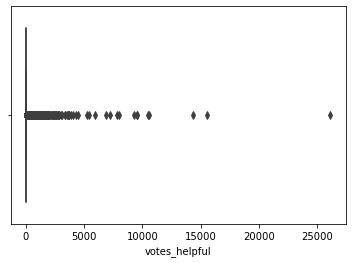

In [11]:
sns.boxplot(x=top_voted_reviews["votes_helpful"])

In [15]:
most_reviews=df.groupby('steam_id')['review_id'].count().reset_index().sort_values('review_id',ascending=False)
most_reviews

,steam_id,review_id
601311,76561198315585536,22
523813,76561198239163744,18
225369,76561198062813911,18
241599,76561198068116100,16
175478,76561198045381877,15
...,...,...
279415,76561198081132038,1
279416,76561198081132150,1
279417,76561198081132361,1
279418,76561198081132539,1


In [162]:
most_reviews.describe()

,review_id
count,799207.000000
mean,1.087795
std,0.367708
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,22.000000


[Text(0.5, 1.0, 'histogram, Reviews per Reviewer')]

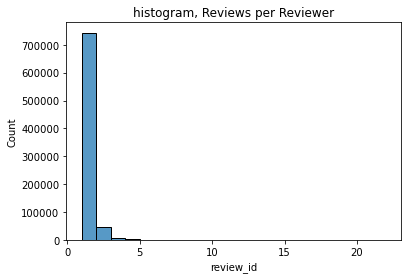

In [131]:
sns.histplot(data=most_reviews,x="review_id").set(title='histogram, Reviews per Reviewer')

<AxesSubplot:xlabel='review_id'>

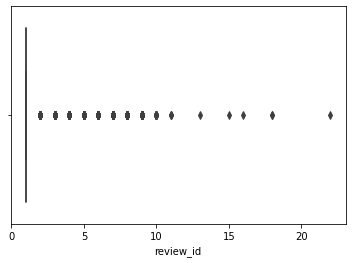

In [132]:
sns.boxplot(x=most_reviews["review_id"])

In [16]:
ohw=pd.merge(left=top_voted_reviews,right=most_reviews, on='steam_id',how='inner')

In [17]:
ohw.rename(columns={'review_id':'num_review'},inplace=True)

In [18]:
# https://www.statology.org/pareto-chart-python/
# Let's create a Pareto Chart using the data from the website above

In [20]:
#create a table for the count of steam_id (users) for every number of reviews

In [21]:
review_count=ohw.groupby('num_review')['steam_id'].count().reset_index()

In [22]:
#add column to display cumulative percentage
#the table shows vast majority of users only give one review
review_count['cumperc'] = review_count['steam_id'].cumsum()/review_count['steam_id'].sum()*100
review_count.set_index('num_review', inplace=True)

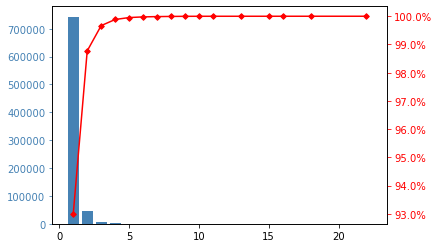

In [40]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(review_count.index, review_count['steam_id'], color=color1)
#ax.set_xticks(review_count.index, review_count['num_review'].values)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(review_count.index, review_count['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

In [41]:
#from the above pareto chart we can see only use votes_helpful as the metric to select best reviewers may not be effective, 
#becasue there are many one hit wonders, we may also need to consider using number of reviews as another metric.

In [20]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [37]:
ohw

,steam_id,votes_helpful,num_review
0,76561198301678331,26149.0,1
1,76561198068792591,15526.0,1
2,76561198107977827,14349.0,1
3,76561198060932732,10610.0,2
4,76561198193312194,10495.0,1
...,...,...,...
799202,76561198038847694,0.0,1
799203,76561198158003620,0.0,2
799204,76561198158002751,0.0,1
799205,76561198158001692,0.0,1


In [ ]:
#create sldier for variable votes

In [152]:
output_slider_votes = widgets.Text()

In [208]:
def votes(votes_helpful):
    output_slider_votes.value = str(votes_helpful)
interact(votes, votes_helpful=(1,10050,50))

interactive(children=(IntSlider(value=5001, description='votes_helpful', max=10050, min=1, step=50), Output())…

<function __main__.votes(votes_helpful)>

In [223]:
output_slider_votes

votes_variable = int(output_slider_votes.value)
print(votes_variable)

101


In [ ]:
#create sldier for variable reviews

In [160]:
output_slider_reviews = widgets.Text()

In [161]:
def reviews(num_reviews):
    output_slider_reviews.value = str(num_reviews)
interact(reviews, num_reviews=(1,22,1))

interactive(children=(IntSlider(value=11, description='num_reviews', max=22, min=1), Output()), _dom_classes=(…

<function __main__.reviews(num_reviews)>

In [186]:
output_slider_reviews

reviews_variable = int(output_slider_reviews.value)
print(reviews_variable)

2


In [224]:
#create new list with constrains using masking
top_reviewers=ohw[(ohw['votes_helpful']>=votes_variable)&(ohw['num_review']>=reviews_variable)]['steam_id'].values

print('cohort Size:', len(top_reviewers))

cohort Size: 1021


In [225]:
#create new table to only include top reviewers, thus I can focus on the targeted users to understand thier behaviors and make data driven decisions
top_reviewers_df=df[df['steam_id'].isin(top_reviewers)]
top_reviewers_df['steam_id'].nunique()

1021

In [194]:
top_reviewers_df.rename(columns={'author.num_games_owned':'author_num_games_owned', 'author.num_reviews':'author_num_reviews',
                                'author.playtime_forever':'author_playtime_forever', 'author.playtime_last_two_weeks':'author_playtime_last_two_weeks',
                                 'author.playtime_at_review': 'author_playtime_at_review','author.last_played':'author_last_played'},inplace=True)

/Users/zhengyanlin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [66]:
#Reviewer analysis: number of games; playtime per game reviewed
#Review analysis: character length of average review; average comments

In [196]:
##number of games
num_games_owned=top_reviewers_df.groupby('steam_id')['author_num_games_owned'].max().reset_index()

[Text(0.5, 1.0, 'histogram, number of game owned')]

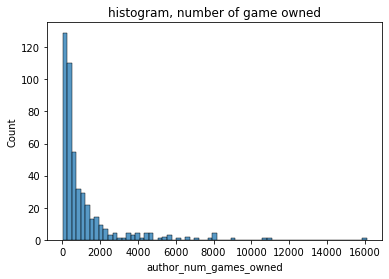

In [197]:
sns.histplot(data=num_games_owned,x="author_num_games_owned").set(title='histogram, number of game owned')

In [200]:
##playtime per game reviewed
playtime=top_reviewers_df.groupby('steam_id')['author_num_games_owned','author_playtime_forever'].max().reset_index()
playtime['playtime_per_game']=playtime['author_playtime_forever']/playtime['author_num_games_owned']

/var/folders/gp/qc2d12610117rn9s1m2xzkxw0000gn/T/ipykernel_21693/717635417.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  playtime=top_reviewers_df.groupby('steam_id')['author_num_games_owned','author_playtime_forever'].max().reset_index()


[Text(0.5, 1.0, 'histogram, playtime per game')]

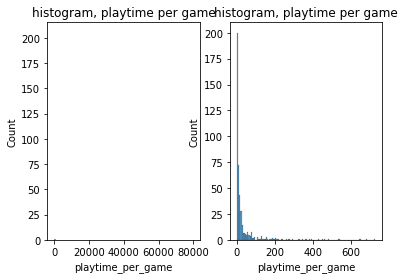

In [227]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2)
sns.histplot(ax=axes[0], data=playtime,x="playtime_per_game").set(title='histogram, playtime per game')

sns.histplot(ax=axes[1], data=playtime[playtime['playtime_per_game']<800],x="playtime_per_game").set(title='histogram, playtime per game')

In [99]:
##character length of average review

/var/folders/gp/qc2d12610117rn9s1m2xzkxw0000gn/T/ipykernel_21693/1319352608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_reviewers_df['review_len']=top_reviewers_df['review'].str.len()


[Text(0.5, 1.0, 'histogram, review length')]

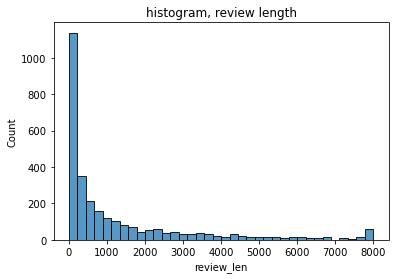

In [228]:
top_reviewers_df['review_len']=top_reviewers_df['review'].str.len()
#top_reviewers_df.head(1)
sns.histplot(data=top_reviewers_df['review_len']).set(title='histogram, review length')

In [107]:
##average comments

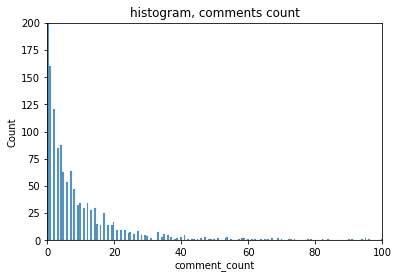

In [229]:
fig, ax = plt.subplots()
sns.histplot(data=top_reviewers_df,x='comment_count').set(title='histogram, comments count')
ax.set_ylim([0, 200])
ax.set_xlim([0, 100])
plt.show()

In [168]:
#one_hit_wonder cohort
one_hit_wonder=ohw[(ohw['votes_helpful']>=5000)&(ohw['num_review']==1)]['steam_id'].values
cohort_size=len(one_hit_wonder)
print('cohort Size:', cohort_size)

cohort Size: 11
